In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1b) find $^OT_A$, $^OT_B$, $^OT_C$,

In [2]:
def rotMat(Tta,ax):
    if ax=='x':
        R = np.array([
            [1, 0, 0],
            [0, np.cos(Tta), -np.sin(Tta)],
            [0, np.sin(Tta), np.cos(Tta)]
        ])
    elif ax=='y':
        R = np.array([
            [np.cos(Tta), 0, -np.sin(Tta)],
            [0, 1, 0],
            [np.sin(Tta), 0, np.cos(Tta)]
        ])
    else:
        R = np.array([
            [np.cos(Tta), -np.sin(Tta), 0],
            [np.sin(Tta), np.cos(Tta), 0],
            [0, 0, 1]
        ])
    return R

def transMat(R,vec):
    row = 0
    coloumn = 1
    t = np.append(vec,np.array([[1]]), axis=row)
    zeroRow = np.zeros([1,3])
    exR = np.append(R, zeroRow, axis=row)
    T = np.append(exR,t, axis=coloumn)
    return T.round(3)
    

In [3]:
#OTA rotates around x 90 degrees
vec = np.array([-2,2,0.5])
vec.shape = 3,1
theta = np.pi/2
R = rotMat(theta, 'x')
OTA = transMat(R, vec)
OTA

array([[ 1. ,  0. ,  0. , -2. ],
       [ 0. ,  0. , -1. ,  2. ],
       [ 0. ,  1. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  1. ]])

In [4]:
#OTB rotates around z 45 degrees
vec = np.array([-1,-2,-2])
vec.shape = 3,1
theta = np.pi/4
R = rotMat(theta, 'z')
OTB = transMat(R, vec)
OTB

array([[ 0.707, -0.707,  0.   , -1.   ],
       [ 0.707,  0.707,  0.   , -2.   ],
       [ 0.   ,  0.   ,  1.   , -2.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [5]:
#OTC rotates around x 180 degrees then around z 180 degrees
vec = np.array([1,-2,2])
vec.shape = 3,1
vec0 = np.zeros([3,1])
theta = np.pi
#Rx = rotMat(theta,'x')
#Rz = rotMat(theta,'z')
R = rotMat(theta,'x').dot(rotMat(theta,'z')) #Rx.dot(Rz)
OTC = transMat(R,vec)
OTC

array([[-1., -0.,  0.,  1.],
       [-0.,  1., -0., -2.],
       [ 0., -0., -1.,  2.],
       [ 0.,  0.,  0.,  1.]])

In [6]:
#BTC rotates 3pi/4 around z and pi around x
Tta = 3*np.pi/4
phi = np.pi
Rz = rotMat(Tta,'z')
Rx = rotMat(phi,'x')
R = Rz.dot(Rx)
BTC = transMat(R,vec)
BTC

array([[-0.707,  0.707,  0.   ,  1.   ],
       [ 0.707,  0.707,  0.   , -2.   ],
       [ 0.   ,  0.   , -1.   ,  2.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [7]:
#CTA rotates pi/2 around x and pi around z
Tta = np.pi/2
psi = np.pi
Rx = rotMat(Tta, 'x')
Rz = rotMat(psi, 'z')
R = Rx.dot(Rz)
vec = np.array([3,4,1.5])
vec.shape = 3,1
CTA = transMat(R,vec)
CTA

array([[-1. , -0. ,  0. ,  3. ],
       [ 0. , -0. , -1. ,  4. ],
       [ 0. , -1. ,  0. ,  1.5],
       [ 0. ,  0. ,  0. ,  1. ]])

In [8]:
#ATB rotates pi/4 around y and -pi/2 around x
Tta = np.pi/4
psi = -np.pi/2
Ry = rotMat(Tta,'y')
Rx = rotMat(psi,'x')
R = Ry.dot(Rx)
vec = np.array([1, -2.5, 4])
vec.shape = 3,1
ATB = transMat(R,vec)
ATB

array([[ 0.707,  0.707, -0.   ,  1.   ],
       [ 0.   ,  0.   ,  1.   , -2.5  ],
       [ 0.707, -0.707,  0.   ,  4.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [9]:
#Get the homogeneus vector
def homoVec(vec):
    row = 0
    t = np.append(vec,np.array([[1]]), axis=row)
    return t

In [10]:
#Ap1 = inv(OTA)Op
Op = np.array([-1,1,2])
Op.shape = 3,1
Op1 = homoVec(Op)
OTAinv = np.linalg.inv(OTA)
Ap1 = OTAinv.dot(Op1)
np.delete(Ap1,3,axis=0)

array([[1. ],
       [1.5],
       [1. ]])

In [11]:
#Bp1 = inv(OTB)Op
OTBinv = np.linalg.inv(OTB)
Bp1 = OTBinv.dot(Op1)
np.delete(Bp1,3,axis=0)

array([[2.12164074],
       [2.12164074],
       [4.        ]])

In [12]:
#Cp1 = inv(OTC)Op
OTCinv = np.linalg.inv(OTC)
Cp1 = OTCinv.dot(Op1)
np.delete(Cp1,3,axis=0)

array([[2.],
       [3.],
       [0.]])

In [13]:
#Ap2 = inv(OTA)Op2
Op_2 = np.array([2,-1,-1])
Op_2.shape = 3,1
Op2 = homoVec(Op_2)
Ap2 = OTAinv.dot(Op2)
np.delete(Ap2,3,axis=0)

array([[ 4. ],
       [-1.5],
       [ 3. ]])

In [14]:
#Bp2 = inv(BTA)Op2
Bp2 = OTBinv.dot(Op2)
np.delete(Bp2,3,axis=0)
# 2.8288.. = 2sqrt(2)
# 1.4144.. = sqrt(2)

array([[ 2.82885431],
       [-1.41442716],
       [ 1.        ]])

In [15]:
#Cp2 = inv(BTA)Op2
Cp2 = OTCinv.dot(Op2)
np.delete(Cp2,3,axis=0)

array([[-1.],
       [ 1.],
       [ 3.]])

In [16]:
OTA

array([[ 1. ,  0. ,  0. , -2. ],
       [ 0. ,  0. , -1. ,  2. ],
       [ 0. ,  1. ,  0. ,  0.5],
       [ 0. ,  0. ,  0. ,  1. ]])

In [17]:
def validRotMat(R):
    Det = np.linalg.det(R).round(3)
    RTR = np.dot(R.T,R).round(3)
    if Det == RTR[0][0]==RTR[1][1]==RTR[2][2]==1:
        print("valid") 
    else:
        print("not valid")
        print(f"R.T.dot(R) =\n {RTR}")
        print(f"and np.linalg.det(R) = {Det}")

In [18]:
R = np.array([
    [1,1,0],
    [0,0,0],
    [0,0,1]
])
validRotMat(R)

not valid
R.T.dot(R) =
 [[1 1 0]
 [1 1 0]
 [0 0 1]]
and np.linalg.det(R) = 0.0


In [19]:
sqr2 = np.sqrt(2)
R = np.array([
    [sqr2/2.0,-sqr2/2.0,0],
    [sqr2/2.0,sqr2/2.0,0],
    [0,0,1]
])
validRotMat(R)

valid


In [20]:
R = np.array([
    [-0.5, 0, 0.886],
    [0, 1, 0],
    [0.866, 0 , -0.5]
])
validRotMat(R)

not valid
R.T.dot(R) =
 [[ 1.     0.    -0.876]
 [ 0.     1.     0.   ]
 [-0.876  0.     1.035]]
and np.linalg.det(R) = -0.517


In [21]:
import robotteknikk as rob

In [22]:
def RollPitchYaw(theta,phi,psi): 
    Rx = rotMat(theta,'x')
    Ry = rotMat(phi,'y')
    Rz = rotMat(psi,'z')
    R = Rx.dot(Ry).dot(Rz)
    return R.round(3)

In [23]:
Tta = np.pi/4
phi = np.pi/6
psi = -np.pi/2
R = RollPitchYaw(Tta,phi,psi)

In [24]:
#Sets figure size
width = 6
height = 6
plt.rcParams['figure.figsize'] = [width, height] 

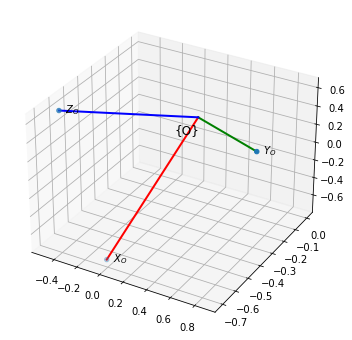

In [25]:
t0 = np.zeros([3,1])
T = transMat(R,t0)
fig = plt.figure()
ax = plt.axes(projection='3d')
rob.trplot3(ax,T, name='O')

In [26]:
def UnitQuaternion(R):
    if R.shape != (3,3):
        print('This function needs a 3x3 rotation matrix')
    else:
        q0 = np.sqrt(1+R[0][0]+R[1][1]+R[2][2])/2
        q1 = (R[2][1]-R[1][2])/(4*q0)
        q2 = (R[0][2]-R[2][0])/(4*q0)
        q3 = (R[1][0]-2*R[0][1])/(4*q0)
        q = np.array([[q1],[q2],[q3]])
        return q        

In [27]:
Q = UnitQuaternion(R)
Q

array([[ 0.43063251],
       [ 0.09227839],
       [-1.08728021]])

In [28]:
def skew(vec):
    #This function makes a skew-symmetric-matrix of a vector
    v1 = vec[0][0]
    v2 = vec[1][0]
    v3 = vec[2][0]
    mat = np.array([
        [0, -v3, v2],
        [v3, 0, -v1],
        [-v2, v1, 0]
    ])
    return mat

def angVec2rotMat(Tta,vec):
    """
    This function uses Rodriges formula to take vector-angle
    representation and turn int into a rotationmatrix
    """
    s = np.sqrt(vec.T.dot(vec))
    v = vec/s # Normalize v => unit lenght
    I = np.eye(3) 
    S = skew(v) 
    R = I + np.sin(Tta)*S + (1-np.cos(Tta))*(np.outer(v,v)-I)
    return R

In [29]:
xi = np.pi/5
vec = np.array([
    [-np.sqrt(2)/2],
    [np.sqrt(2)/2],
    [0]
])
R = angVec2rotMat(xi,vec)
R

array([[ 0.9045085 , -0.0954915 ,  0.41562694],
       [-0.0954915 ,  0.9045085 ,  0.41562694],
       [-0.41562694, -0.41562694,  0.80901699]])

In [30]:
UnitQuaternion(R)

array([[-0.21850801],
       [ 0.21850801],
       [ 0.02510143]])

In [31]:
Tta = np.pi/4
phi = np.pi/6
psi = -np.pi/2
R = RollPitchYaw(Tta,phi,psi)

In [32]:
eigen, vec = np.linalg.eig(R)
for val in eigen:
    print(val.round(3))

(-0.371+0.929j)
(-0.371-0.929j)
(1+0j)


In [33]:
for row in vec:
    print(row.round(3))

[-0.041-0.603j -0.041+0.603j -0.52 +0.j   ]
[ 0.703+0.j  0.703-0.j -0.111+0.j]
[0.067-0.37j 0.067+0.37j 0.847+0.j  ]


In [34]:
col = vec[:,2]
col.shape = 3,1
col

array([[-0.52001553+0.j],
       [-0.11128576+0.j],
       [ 0.84687622+0.j]])

In [35]:
np.real(col)

array([[-0.52001553],
       [-0.11128576],
       [ 0.84687622]])

In [36]:
def rotMat2angVec(R):
    """
    This function takes a rotation matrix and returns 
    the equivalent vector and angle representation
    """
    eigVal, eigVec = np.linalg.eig(R)
    pos = 0
    for val in eigVal:
        if np.real(val.round(3)) == 1:
            realEigVal_pos = pos
        elif np.angle(val)>0:
            angle = np.angle(val)
        pos += 1
    vec = np.real(eigVec[:,realEigVal_pos])
    vec.shape = 3,1
    return vec, angle

In [37]:
vec, Tta = rotMat2angVec(R)
vec

array([[-0.52001553],
       [-0.11128576],
       [ 0.84687622]])

In [38]:
np.degrees(Tta)

111.76430143942149